В этом уроке вы изучите параметрические статистические тесты, используемые для сравнения средних.

После изучения этого урока вы будете знать:

*   t-критерий Стьюдента для одной выборки;
*   t-критерий Стьюдента для двух независимых выборок;
*   t-критерий Стьюдента для двух зависимых выборок (парных наблюдений);
*   однофакторный дисперсионный анализ, ANOVA.

В этом уроке используйте файл используйте excel файл с данными, доступный по сылке

https://drive.google.com/file/d/1XJHELLqNpm3ejZxFJ7SpDV-wHARdX5j8/view?usp=sharing


# Постановка задачи

В медицинском центре охраны здоровья проходили обследование рабочие трех предприятий, по 200 рабочих с каждого предприятия. В файле приведены данные об уровне гемоглобина, гр/литр, (Hb) рабочих. Исследовались только мужчины в возрасте от 20 до 40 лет. Данные собраны в 6 столбцов: Hb1Bef, Hb1Aft, Hb2Bef, Hb2Aft, Hb3Bef, Hb3Aft. Уровень гемоглобина был измерен при госпитализации и при выписке через 14 дней.

*  Hb1Bef, Hb1Aft - уровень гемоглобина рабочих первого предприятия при госпитализации и через 14 дней, соответственно;
*  Hb2Bef, Hb2Aft - уровень гемоглобина рабочих первого предприятия при госпитализации и через 14 дней, соответственно;
*  Hb3Bef, Hb3Aft - уровень гемоглобина рабочих первого предприятия при госпитализации и через 14 дней, соответственно.


# Задача 1

Исследуется влияние неблагоприятных производственных факторов на уровнень гемоглобина у рабочих. В столбце Hb1Bef приведены данные об уровне гемоглобина у 200 рабочих первого предприятия на момент госпитализации.

Считая нижней границей нормы уровень 130 гр/литр крови, определить, не снижен ли уровень гемоглобина у рабочих.


### Шаг 1
Начать надо с загрузки и чтения файла.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [ ]:
from google.colab import files
import pandas as pd
from scipy import stats

files.upload()
df1 = pd.read_excel('task1.xlsx', index_col=0)#Data Frame
df1

Saving task1.xlsx to task1.xlsx


,Hb1Bef,Hb1Aft,Hb2Bef,Hb2Aft,Hb3Bef,Hb3Aft
0,136,126,114,121,136,127
1,114,138,128,137,136,105
2,115,124,131,122,113,134
3,109,150,139,127,126,126
4,129,117,123,117,127,114
...,...,...,...,...,...,...
195,104,138,142,120,127,127
196,126,111,134,143,105,123
197,124,139,137,125,127,115
198,128,130,122,139,132,137


## Шаг 2
Найдем описательные статистики, построим гистограмму и график "ящик с усами".

По полученным результатам можно сделать предположение, что уровень гемоглобина снижен на 10 гр/литр по сравнению с нижней границей нормы. Чтобы проверить это предположение нужны соответствующие критерии.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html

In [ ]:
df1.describe()

,Hb1Bef,Hb1Aft,Hb2Bef,Hb2Aft,Hb3Bef,Hb3Aft
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,121.060000,129.965000,127.985000,131.195000,128.745000,128.620000
std,9.101681,10.366828,10.454245,9.944417,9.110708,10.053905
min,96.000000,102.000000,102.000000,104.000000,97.000000,104.000000
25%,115.750000,123.000000,121.000000,125.000000,123.750000,122.000000
50%,121.000000,129.000000,128.000000,132.000000,129.000000,128.500000
75%,127.000000,137.000000,135.250000,139.000000,134.000000,135.000000
max,145.000000,160.000000,167.000000,165.000000,152.000000,155.000000


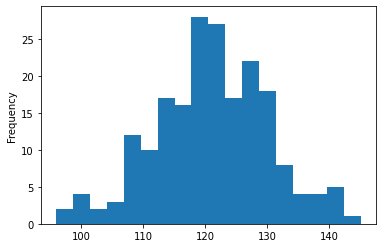

In [ ]:
histogram = df1['Hb1Bef'].plot.hist(bins=18)
#how coarse is it

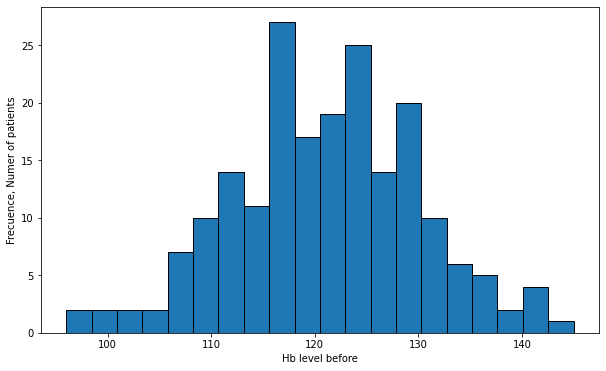

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.hist(df1['Hb1Bef'], bins = 20, ec='black')
plt.xlabel('Hb level before')
plt.ylabel('Frequence, Numer of patients')
plt.show()

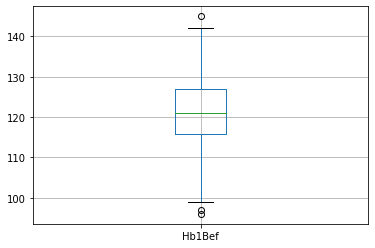

In [ ]:
boxplot = df1.boxplot(column=['Hb1Bef'])

Для решения задачи необходимо выбрать соответствующий статистический критерий и сформулировать нулевую гипотезу.

Применим одновыборочный t-критерия Стьюдента.
Проверим нулевую гипотезу состоящую в том, что генеральное среднее равно заданному значению; в данном примере 130.

**Вопрос для обсуждения**

Для применения одновыборочного t-критерия Стьюдента необходимо, чтобы данные удовлетворяли определенным требованиям. Каким?

###Шаг 3. Тесты на нормальность

Существует множество статистических тестов, используемых для статистической проверки того, была ли данная выборка извлечена из нормально распределенной генеральной совокупности или нет.

Каждый тест делает разные предположения и рассматривает разные аспекты данных. Мы рассмотрим три часто используемых теста.

Прежде чем применять статистические тесты, необходимо знать, как интерпретировать результаты. Каждый тест вернет как минимум две величины:

*  Статистика (statistic, float или array): величина, вычисляемая тестом, которую можно интерпретировать в контексте теста, сравнивая ее с критическими значениями из распределения статистики теста;
*  p-значение (pvalue, float или array): вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное (чем посчитанная statistic) значение статистики, при условии, что нулевая гипотеза верна.

p-значение используется для интерпретации теста; в данном случае позволяет ответить на вопрос, была ли выборка взята из нормально распределенной генеральной совокупности.

Критерий Шапиро-Уилка

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html


Поскольку p-value больше уровня значимости $\alpha = 0.05,$ нет оснваний отвергнуть нулевую гипотезу о нормальности. Считаем данными нормально распределеными.

In [ ]:
shapiro_test = stats.shapiro(df1['Hb1Bef'])
print(shapiro_test)

(0.9945846199989319, 0.688219428062439)


Проверим нормальность данных во всех столбцах, чтобы не возвращаться к этому вопросу в дальнейшем.

In [ ]:
for column in df1:
    shapiro_test = stats.shapiro(df1[column])
    print(shapiro_test[1])

0.688219428062439
0.8150795102119446
0.10010725259780884
0.3508819043636322
0.1274675577878952
0.4743872284889221


In [ ]:
stats.ttest_1samp(df1['Hb1Bef'], 130)

Ttest_1sampResult(statistic=-13.89091618413475, pvalue=4.094988734053972e-31)

4.09 * 10^(-31) =
0.000000000000000000000000000000000000000409

**Задание для самостоятельной работы**

Считая нижней границей нормы уровень 130 гр/литр крови, определить, не снижен ли уровень гемоглобина у рабочих второго и третьего предприятий.

# Задача 2

Предприятия №1 и №2 расположены в одном городе, а потому влияние климатических факторов исключено. Определеить, значимо ли отличие в уровне гемоглобина у рабочих первого и второго предприятий на момент госпитализации


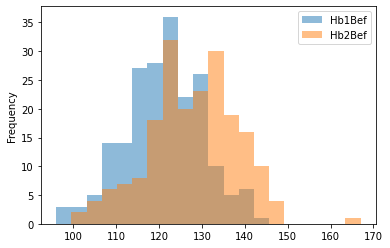

In [ ]:
histogram = df1[['Hb1Bef', 'Hb2Bef']].plot.hist(bins=20, alpha = 0.5)

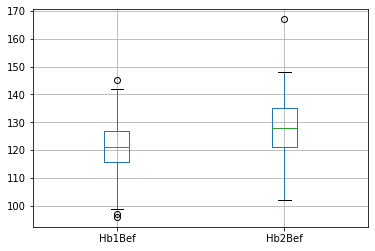

In [ ]:
boxplot = df1.boxplot(column=['Hb1Bef', 'Hb2Bef'])

Используем t-тест Стьюдента для сравнения средних в двух независимых группах. Поскольку p-value меньше уровня значимости 𝛼=0.05, нулевую гипотезу отвергаем как противоречащую экспериментальным данным.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

Вывод: на момент госпитализации уровень гемоглобина у рабочих первого предприятия статистически значимо ниже, чем у рабочих второго предприятия.

In [ ]:
stats.ttest_ind(df1['Hb1Bef'], df1['Hb2Bef'])

Ttest_indResult(statistic=-7.065373273996594, pvalue=7.208812496615759e-12)

$7.2 * 10^{-12}$

**Задание для самостоятельной работы**

Определеить, значимо ли отличие в уровне гемоглобина у рабочих предприятий №2 и №3 на момент госпитализации.




# Задача 3

После проходждения обследования и лечения в течение 14 дней рабочих выписывали. В рамках проводимых клинических испытаний у рабочих каждого предприятия применяли свой (различный) метод лечения.

Определить, эффективно ли прошло лечение в группе рабочих первого предприятия. То есть, значимо ли отличие в уровне гемоглобина у рабочих первого предприятия на момент госпитализации и на момент выписки.


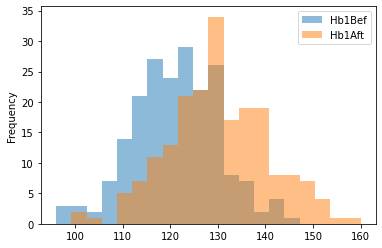

In [ ]:
histogram = df1[['Hb1Bef', 'Hb1Aft']].plot.hist(bins=20, alpha = 0.5)

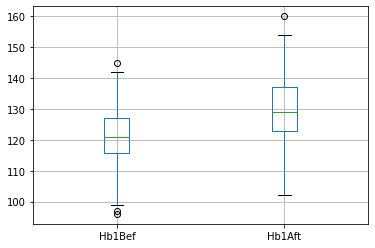

In [ ]:
boxplot = df1.boxplot(column=['Hb1Bef', 'Hb1Aft'])

Используем t-тест Стьюдента для сравнения средних в двух зависимых группах (парные наблюдения). Поскольку p-value меньше уровня значимости 𝛼=0.05, нулевую гипотезу отвергаем как противоречащую экспериментальным данным.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

Вывод: лечение прошло эффективно в группе рабочих первого предприятия. То есть, отличие в уровне гемоглобина у рабочих первого предприятия на момент госпитализации и на момент выписки статистически значимо.

In [ ]:
stats.ttest_rel(df1['Hb1Bef'], df1['Hb1Aft'])

Ttest_relResult(statistic=-8.938391001537303, pvalue=2.7086764954838806e-16)

**Обсуждение**. Действительно ли важно различать парные и независимые t-тесты?

Чтобы ответить на этот вопрос, рассмотрим очень простой пример.

In [ ]:
from scipy.stats import norm
from matplotlib import pyplot
from scipy import stats

sampleBef = norm.rvs(size=25, loc = 100, scale=20, random_state=1)
sampleAft = sampleBef + norm.rvs(size=25, loc = 1, scale=2, random_state=1)
#sampleAft = sampleBef + 1

print(stats.ttest_ind(sampleBef, sampleAft))
print(stats.ttest_rel(sampleBef, sampleAft))

TtestResult(statistic=-0.14924049493728236, pvalue=0.8819891506912603, df=48.0)
TtestResult(statistic=-2.2186194576215135, pvalue=0.03622342600548493, df=24)


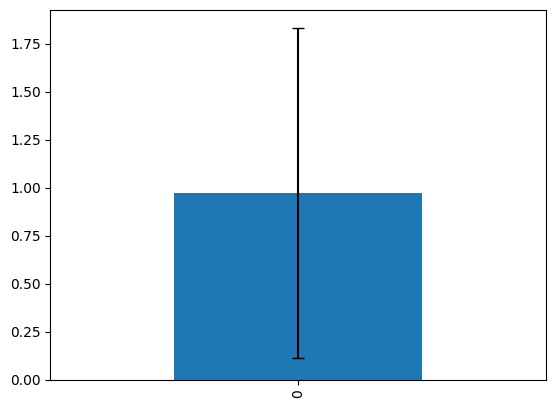

In [ ]:
#import matplotlib.pyplot as plt

diff = sampleAft - sampleBef
diff = pd.DataFrame(diff)

means = diff.mean()
errors = diff.std() * 1.96 / len(diff) ** 0.5

fig, ax = plt.subplots()

means.plot.bar(yerr=errors, ax=ax, capsize=4);

**Задание для самостоятельной работы**

Определеить, эффективно ли прошло лечение в группе рабочих предприятиий №2 и №3. То есть, значимо ли отличие в уровне гемоглобина на момент госпитализации и на момент выписки.


# Задача 4


Определеить, значимо ли отличие в уровне гемоглобина у рабочих первого, второго и третьего предприятий на момент госпитализации. Использовать Однофакторный дисперсионный анализ.

Однофакторный дисперсионный анализ (англ. One way ANOVA) проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение. Тест применяется к выборкам, возможно, разного размера.

In [ ]:
from scipy.stats import f_oneway

f_oneway(df1['Hb1Bef'], df1['Hb2Bef'], df1['Hb3Bef'])

F_onewayResult(statistic=39.10506941909032, pvalue=1.0985246015570126e-16)

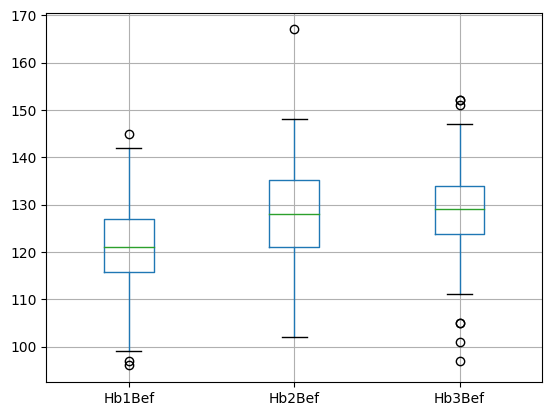

In [ ]:
boxplot = df1.boxplot(column=['Hb1Bef', 'Hb2Bef', 'Hb3Bef'])

Вывод: на момент госпитализации уровени гемоглобина у рабочих статистически значимо различаются.

**Задание для самостоятельной работы**

Определеить, значимо ли отличие в уровне гемоглобина у рабочих первого, второго и третьего предприятий на момент выписки. Использовать Однофакторный дисперсионный анализ.

In [ ]:
#import pandas as np
#from scipy import stats
x = np.Series([624, 598, 609, 592, 588, 578, 598, 604, 616, 628, 634, 605, 590, 628, 632, 584, 627, 612, 606, 620, 641, 585, 641, 637, 648])
print(x.describe())
print(13/ (20.5/ 5))

count     25.000000
mean     613.000000
std       20.516254
min      578.000000
25%      598.000000
50%      612.000000
75%      628.000000
max      648.000000
dtype: float64
3.1707317073170733


In [ ]:
from scipy.stats import norm

alpha = 0.05
print(norm.ppf(1 - alpha/2)) #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).
2*(1- norm.cdf(3.17073))

1.959963984540054


0.0015205640402902176